In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize

from pyod.models.lof import LOF

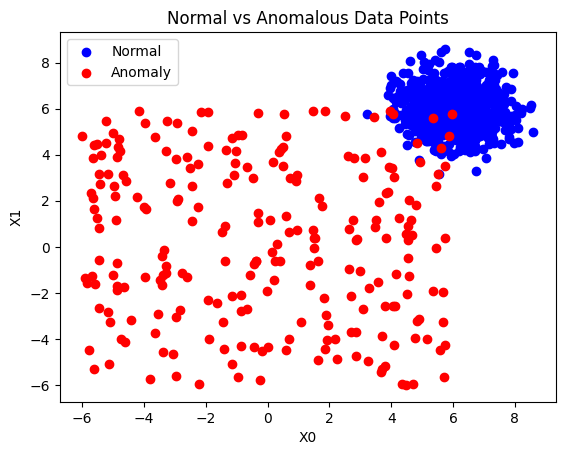

In [21]:
# Task 0
dataframe = pd.read_csv("anomaly_data.csv", delimiter=",")
# dataframe.info()

X, y = dataframe.iloc[:, :2], dataframe.iloc[:, -1]

normal = dataframe[dataframe['y'] == 0.0]
anomalies = dataframe[dataframe['y'] == 1.0]

plt.scatter(normal['X0'], normal['X1'], c='blue', label='Normal')
plt.scatter(anomalies['X0'], anomalies['X1'], c='red', label='Anomaly')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Normal vs Anomalous Data Points')
plt.legend()
plt.show()

ROC-AUC: 0.8235
Average Precision: 0.4754


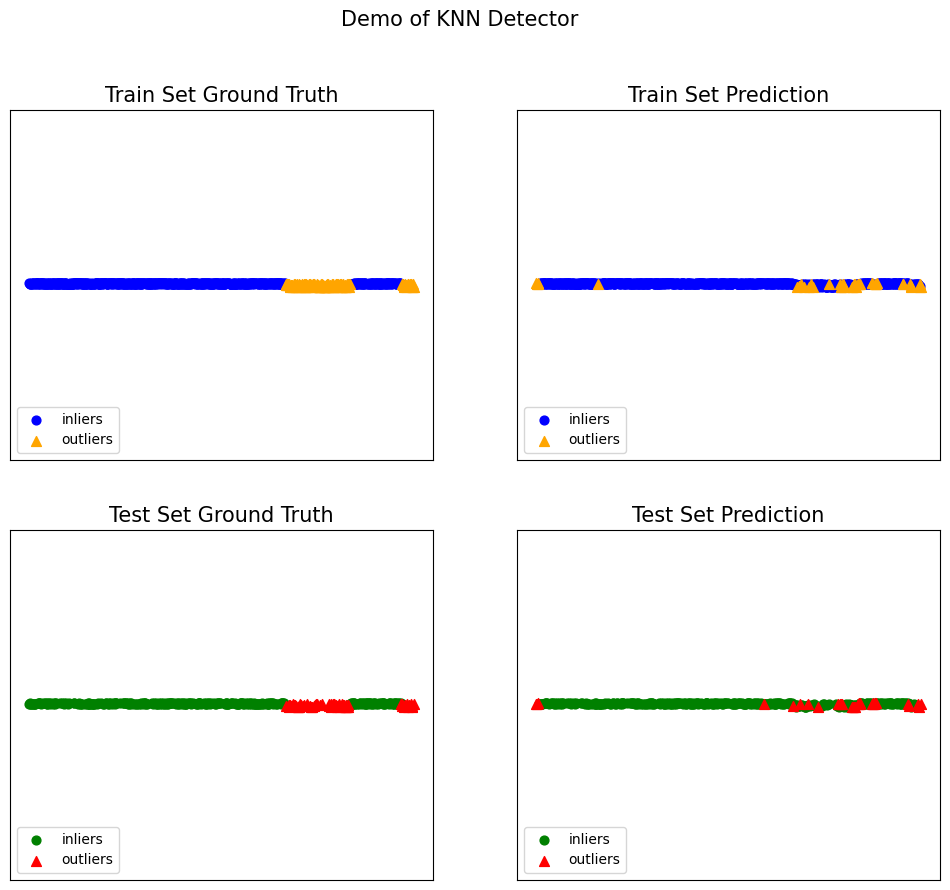

In [22]:
# Task 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = KNN(n_neighbors=10, method="largest", metric="euclidean")
clf.fit(X_train)

y_test_scores = clf.decision_function(X_test) # outlier scores

y_train_pred = clf.predict(X_train) # outlier labels (0 or 1)
y_test_pred = clf.predict(X_test) # outlier labels (0 or 1)

roc_auc = roc_auc_score(y_test, y_test_scores)
average_precision = average_precision_score(y_test, y_test_scores)

print("ROC-AUC: {:.4f}".format(roc_auc))
print("Average Precision: {:.4f}".format(average_precision))

visualize("KNN", X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)


In [23]:
# Task 2
n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
method = {"largest", "mean", "median"}

for m in method:
    print(f"Method: {m}")
    for n in n_neighbors:
        clf = KNN(n_neighbors=n, method=m, metric="euclidean")
        clf.fit(X_train)

        y_test_scores = clf.decision_function(X_test) # outlier scores

        y_train_pred = clf.predict(X_train) # outlier labels (0 or 1)
        y_test_pred = clf.predict(X_test) # outlier labels (0 or 1)

        roc_auc = roc_auc_score(y_test, y_test_scores)
        average_precision = average_precision_score(y_test, y_test_scores)

        print(f"n_neighbors: {n} | ROC-AUC: {roc_auc:.4f} | Average Precision: {average_precision:.4f}")
    print("\n")

Method: median
n_neighbors: 2 | ROC-AUC: 0.8788 | Average Precision: 0.7605
n_neighbors: 4 | ROC-AUC: 0.9112 | Average Precision: 0.7688
n_neighbors: 6 | ROC-AUC: 0.9179 | Average Precision: 0.7880
n_neighbors: 8 | ROC-AUC: 0.9182 | Average Precision: 0.7806
n_neighbors: 10 | ROC-AUC: 0.9161 | Average Precision: 0.7459
n_neighbors: 12 | ROC-AUC: 0.9035 | Average Precision: 0.6777
n_neighbors: 14 | ROC-AUC: 0.8847 | Average Precision: 0.6316
n_neighbors: 16 | ROC-AUC: 0.8569 | Average Precision: 0.5742
n_neighbors: 18 | ROC-AUC: 0.8339 | Average Precision: 0.5176
n_neighbors: 20 | ROC-AUC: 0.8068 | Average Precision: 0.4565


Method: mean
n_neighbors: 2 | ROC-AUC: 0.8788 | Average Precision: 0.7605
n_neighbors: 4 | ROC-AUC: 0.9288 | Average Precision: 0.8136
n_neighbors: 6 | ROC-AUC: 0.9422 | Average Precision: 0.8184
n_neighbors: 8 | ROC-AUC: 0.9379 | Average Precision: 0.7886
n_neighbors: 10 | ROC-AUC: 0.9282 | Average Precision: 0.7416
n_neighbors: 12 | ROC-AUC: 0.9136 | Average Prec

In [27]:
# Task 3
n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


for n in n_neighbors:
    lof = LOF(n_neighbors=n, metric="euclidean")
    lof.fit(X_train)

    y_test_scores = lof.decision_function(X_test) # outlier scores

    y_train_pred = lof.predict(X_train) # outlier labels (0 or 1)
    y_test_pred = lof.predict(X_test) # outlier labels (0 or 1)
    
    # display(y_test)
    # display(y_test_pred)

    roc_auc = roc_auc_score(y_test, y_test_scores)
    average_precision = average_precision_score(y_test, y_test_scores)

    print(f"n_neighbors: {n} | ROC-AUC: {roc_auc:.4f} | Average Precision: {average_precision:.4f}")
print("\n")

n_neighbors: 2 | ROC-AUC: 0.4544 | Average Precision: 0.2585
n_neighbors: 4 | ROC-AUC: 0.5274 | Average Precision: 0.2652
n_neighbors: 6 | ROC-AUC: 0.4794 | Average Precision: 0.2125
n_neighbors: 8 | ROC-AUC: 0.4457 | Average Precision: 0.1792
n_neighbors: 10 | ROC-AUC: 0.4421 | Average Precision: 0.1714
n_neighbors: 12 | ROC-AUC: 0.4747 | Average Precision: 0.1802
n_neighbors: 14 | ROC-AUC: 0.4718 | Average Precision: 0.1788
n_neighbors: 16 | ROC-AUC: 0.4656 | Average Precision: 0.1817
n_neighbors: 18 | ROC-AUC: 0.4655 | Average Precision: 0.1772
n_neighbors: 20 | ROC-AUC: 0.4843 | Average Precision: 0.1843


